# **Handwritten Digit Classification using CNN**

In [1]:
#importing modules
import tensorflow as tf
from tensorflow import keras

In [2]:
#loading the mnist data and spliting it into train test
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

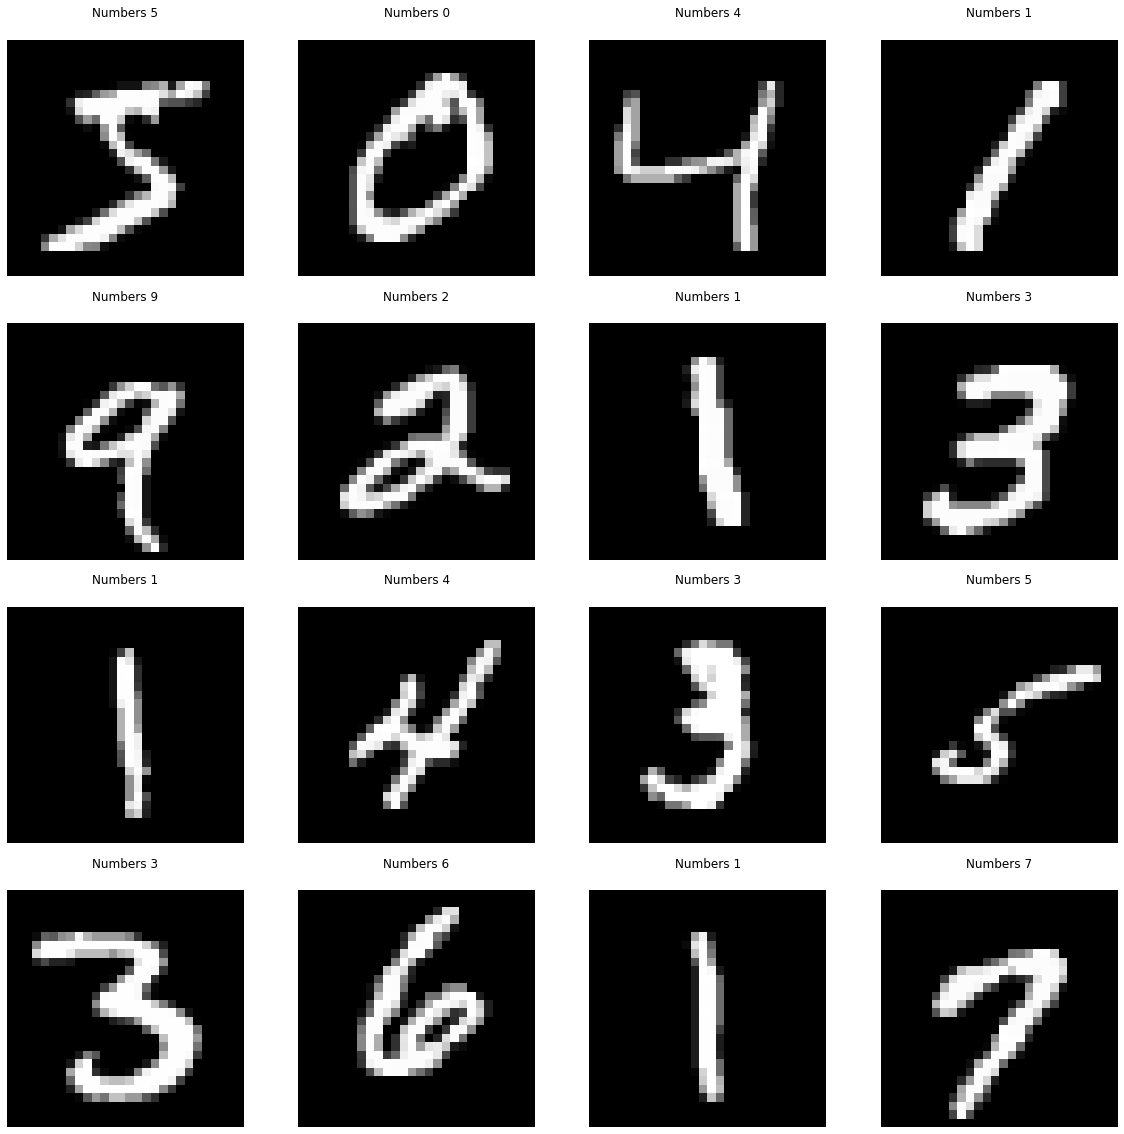

In [8]:
#visualisation of Digits in dataset
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(4, 4, figsize = (20,20))
plt.gray()

for i, ax in enumerate(axes.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Numbers {}'. format(y_train[i]))

fig.show()

In [13]:
#reshaping the images to 28x28x1 pixels
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [15]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train Shape', x_train.shape)
print('No of Images in x_train', x_train.shape[0])
print('No of Images in x_test', x_test.shape[0])

x_train Shape (60000, 28, 28, 1)
No of Images in x_train 60000
No of Images in x_test 10000


In [18]:
#importing modules for building models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [19]:
#building the model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [23]:
#compilation of the model 
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0869 - accuracy: 0.9732
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0579 - accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0431 - accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0349 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0279 - accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0229 - accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0207 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0191 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0162 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 22s 12m

In [26]:
#testing the model on testing data
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0705 - accuracy: 0.9840


[0.07046408951282501, 0.984000027179718]

In [27]:
import matplotlib.pyplot as plt
from sklearn import metrics

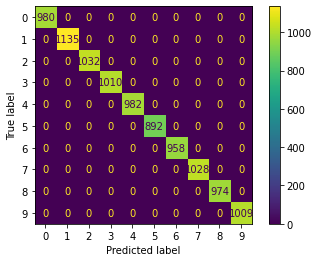

In [29]:
#ploting the confuion matrics
confusion_matrix = metrics.confusion_matrix(y_test, y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()